<a href="https://colab.research.google.com/github/AydenRU/neural_networks-/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

df = pd.read_csv("Boston Dataset.csv")
df.drop(columns=['Unnamed: 0'], axis=0, inplace=True)
df.head()

X = df.drop(columns=['medv', 'rad'], axis=1)
y = df['medv']
print(X.describe())



             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         tax     ptratio       black       lstat  
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  
mean    68.574901    3.795043  408.237154   18.455534  356.674032   12.653063  
std     28.148861    2.105710 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((404, 12), (102, 12))

#### 1.2. Проектируем архитектуру для этой задачи

In [6]:
# Ваш код
from keras.layers import Dense
from keras.models import Sequential

model = Sequential([
    Dense(16, input_shape=(12,), activation='relu'),
    Dense(1, activation='relu')
])

#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [7]:
model.compile(optimizer='sgd', loss='mse', metrics='mae')

#### 1.4. Обучаем модель ИНС

In [8]:
# Ваш код
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
13/13 [==============================] - 1s 3ms/step - loss: 596.4409 - mae: 22.6119
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 596.4409 - mae: 22.6119
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 596.4409 - mae: 22.6119
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 596.4409 - mae: 22.6119
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 596.4409 - mae: 22.6119
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 596.4409 - mae: 22.6119
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 596.4409 - mae: 22.6119
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 596.4409 - mae: 22.6119
Epoch 9/20
13/13 [==============================] - 0s 3ms/step - loss: 596.4409 - mae: 22.6119
Epoch 10/20
13/13 [==============================] - 0s 3ms/step - loss: 596.4408 - mae: 22.6119
Epoch 11/20
13/13 [====================

In [9]:
# Масштабирую данные
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# scaler = StandardScaler()  # Стандартизация по среднему и стандартному отклонению
scaler = MinMaxScaler()  # Масштабирование в диапазон 0-1

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = Sequential([
    Dense(16, input_shape=(12,), activation='relu'),
    Dense(1, activation='relu')
])
model.compile(optimizer='sgd', loss='mse', metrics='mae')

In [11]:
stude= model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
13/13 [==============================] - 1s 23ms/step - loss: 167.6376 - mae: 9.2828 - val_loss: 79.4795 - val_mae: 5.7113
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 52.7964 - mae: 5.1398 - val_loss: 74.0899 - val_mae: 5.5681
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 51.5077 - mae: 5.2486 - val_loss: 110.2386 - val_mae: 9.3463
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 51.8181 - mae: 5.5514 - val_loss: 96.0930 - val_mae: 8.5743
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 45.4974 - mae: 4.9830 - val_loss: 50.1847 - val_mae: 5.1420
Epoch 6/200
13/13 [==============================] - 0s 7ms/step - loss: 41.3356 - mae: 4.6928 - val_loss: 49.5371 - val_mae: 4.6174
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 29.8504 - mae: 4.0028 - val_loss: 50.3650 - val_mae: 5.5338
Epoch 8/200
13/13 [==============================] - 0s 6ms/step -

#### 1.6. Делаем предсказания на тестовых данных

In [12]:
# Ваш код
preds = model.predict(X_test)


4/4 [==============================] - 0s 3ms/step


#### 1.7. Вычисляем метрику качества на тестовых данных

In [13]:
# Ваш код
from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test)

2.827168761047663

#### 1.8. Строим график обучения

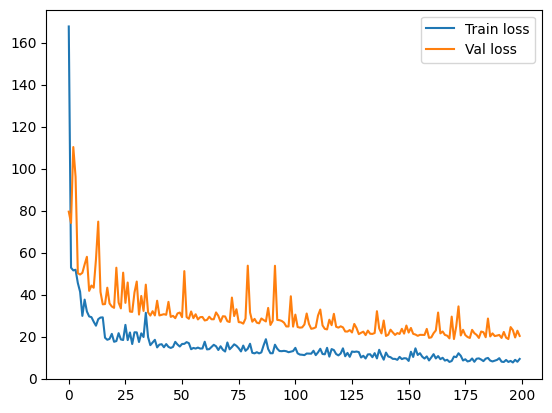

In [14]:
# Ваш код
plt.plot(stude.history['loss'], label='Train loss')
plt.plot(stude.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [15]:
# Ваш код
def preprocess_input(features, scale_model="scaler.pkl"):

  """
  Функция преобразует входные данные в формат,
  подходящий для модели машинного обучения.

  Args:
      features: Список или массив с входными признаками.
      scale_model: Путь к файлу с сохраненной моделью масштабирования.

  Returns:
      Преобразованный массив признаков.
  """

  try:
    # Преобразование в NumPy массив
    features = np.array(features)

    # Проверка на пустой массив
    if not features.size:
      raise ValueError("Пустой массив признаков!")

    # Изменение размерности массива (8,) -> (1, 8)
    features = features.reshape(1, -1)

    # Загрузка модели масштабирования
    with open(scale_model, "rb") as f:
      scaler = pickle.load(f)

    # Масштабирование признаков
    features = scaler.transform(features)

  except Exception as e:
    raise ValueError(f"Ошибка при предобработке: {e}")

  return features

def predict_price(*features):

  """
  Функция прогнозирует цену на основе предобработанных
  входных признаков.

  Args:
      features: Список или массив с входными признаками.

  Returns:
      Прогнозируемая цена (в долларах).
  """

  try:
    # Предобработка входных признаков
    features = preprocess_input(features)

    # Прогнозирование цены
    prediction = model.predict(features, verbose=0)

    # Проверка на ошибки прогнозирования
    if np.isnan(prediction).any():
      raise ValueError("Ошибка при прогнозировании: NaN")

  except Exception as e:
    raise ValueError(f"Ошибка при прогнозировании: {e}")

  # Возвращение прогнозируемой цены
  # (умножение на 1000 для отображения в тысячах долларов)
  return f"{prediction[0][0] * 1000}"

In [16]:
!pip install gradio

In [17]:
import gradio as gr

# Интерфейс Gradio
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(label="CRIM", minimum=0.5, maximum=15, step=0.1, value=8.3252),
        gr.Slider(label="ZN", minimum=1, maximum=50, step=1, value=41.0),
        gr.Slider(label="INDUS", minimum=1, maximum=20, step=0.01, value=6.984127),
        gr.Slider(label="CHAS", minimum=0, maximum=1, step=0.01, value=0.23810),
        gr.Slider(label="NOX", minimum=0, maximum=0.8, step=0.01, value=0.5),
        gr.Slider(label="RM", minimum=4, maximum=8.5, step=0.1, value=6.555556),
        gr.Slider(label="AGE", minimum=3, maximum=100, step=0.1, value=37.88),
        gr.Slider(label="DIS", minimum=1.15, maximum=12, step=0.1, value=10.23),
        gr.Slider(label="TAX", minimum=187, maximum=711, step=0.1, value=400.23),
        gr.Slider(label="PTRATIO", minimum=12.6, maximum=22, step=0.1, value=16.23),
        gr.Slider(label="B", minimum=0.32, maximum=396.9, step=0.1, value=122.23),
        gr.Slider(label="LSTAT", minimum=1.73, maximum=37.97, step=0.1, value=12.54),
    ],
    live=True,
    outputs=gr.Text(label="Predicted Price ($)"),
)



#### 2. Проверка обученной модели пользовательскими данными

In [18]:
# Ваш код
# Запуск интерфейса
interface.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://1d4b44df71a3944236.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://1d4b44df71a3944236.gradio.live


## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [19]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

### 2. Загружаем набор данных:

In [39]:
# Ваш код
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Задание_2/dataset/train")))
random.shuffle(imagePaths)

### 3. Указываем путь к набору данных:

In [21]:
# Ваш код

### 4. Загружаем набор данных и формируем общую выборку:

In [41]:
# Ваш код
def load_images(imagePaths, compression_size = 32):
  """
  Функция для загрузки изображений и преобразования их в векторы признаков.

  Args:
    imagePaths: список путей к изображениям.
    compression_size: размер сжатия изображения

  Returns:
    data: список векторов признаков (сжатых изображений, преобразованных в векторы).
    labels: список меток классов.
  """

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size)).flatten()

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

In [42]:
compression_size = 32

data, labels = load_images(imagePaths, compression_size)

#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [44]:
# Ваш код
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [63]:
# Ваш код
(X_train, X_val, Y_train, Y_val) = train_test_split(data, labels, test_size=0.25, random_state=42)

lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_val = lb.transform(Y_val)

### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [64]:
input_shape = (compression_size * compression_size * 3,)

In [65]:
model = Sequential([
    Dense(1024, input_shape=input_shape, activation="relu"),
    Dense(128, activation="relu"),
    Dense(len(lb.classes_), activation="softmax")
    ])


#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [66]:
# Ваш код
INIT_LR = 0.0005
EPOCHS = 200

#### 5.3. Компилируем модель:

In [67]:
# Ваш код
opt = Adam(learning_rate=INIT_LR)

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [68]:
# Ваш код
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5) # Остановка обучения, если
                                             # валидационная точность не
                                             # улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0) # Сохранение модели
                                         # только при улучшении
                                         # валидационной точности

#### 6.2. Запустим процесс обучения модели:

In [69]:
# Ваш код
H = model.fit(X_train, Y_train,
              validation_data=(X_val, Y_val),
              epochs=EPOCHS,
              batch_size=100,
              callbacks=[early_stopping, checkpoint])

Epoch 1/200
28/28 [==============================] - 4s 116ms/step - loss: 1.0911 - accuracy: 0.3731 - val_loss: 1.0862 - val_accuracy: 0.3644
Epoch 2/200
28/28 [==============================] - 3s 102ms/step - loss: 1.0706 - accuracy: 0.4233 - val_loss: 1.0560 - val_accuracy: 0.4654
Epoch 3/200
28/28 [==============================] - 3s 92ms/step - loss: 1.0253 - accuracy: 0.4797 - val_loss: 1.0066 - val_accuracy: 0.4797
Epoch 4/200
28/28 [==============================] - 2s 75ms/step - loss: 0.9788 - accuracy: 0.4995 - val_loss: 0.9632 - val_accuracy: 0.4995
Epoch 5/200
28/28 [==============================] - 2s 76ms/step - loss: 0.9345 - accuracy: 0.5412 - val_loss: 0.9330 - val_accuracy: 0.5357
Epoch 6/200
28/28 [==============================] - 3s 98ms/step - loss: 0.9062 - accuracy: 0.5606 - val_loss: 0.9360 - val_accuracy: 0.5236
Epoch 7/200
28/28 [==============================] - 3s 102ms/step - loss: 0.8965 - accuracy: 0.5687 - val_loss: 0.9057 - val_accuracy: 0.5368
Epo

#### 6.3. Загружаем лучшую модель:

In [70]:
# Ваш код
from keras.models import load_model

model = load_model("/content/best_model.h5")

### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [71]:
# Ваш код
predictions = model.predict(X_val, batch_size=32)

print(classification_report(Y_val.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

29/29 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

     cavallo       0.61      0.56      0.58       279
    elefante       0.55      0.60      0.58       299
       ragno       0.78      0.78      0.78       333

    accuracy                           0.65       911
   macro avg       0.65      0.64      0.65       911
weighted avg       0.65      0.65      0.65       911



#### 7.2. Выведем матрицу ошибок

29/29 [==============================] - 0s 9ms/step


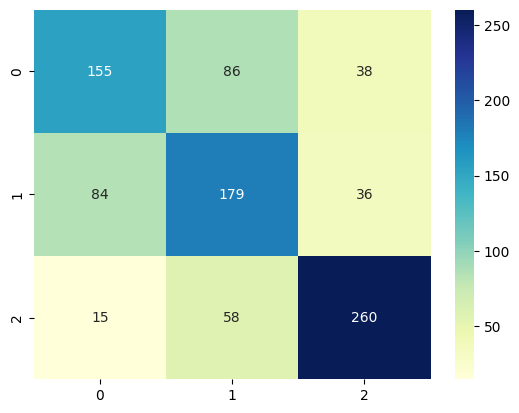

In [72]:
# Ваш код
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
Y_pred = model.predict(X_val, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
Y_val = Y_val.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(Y_val, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

#### 7.3. Отобразим график обучения

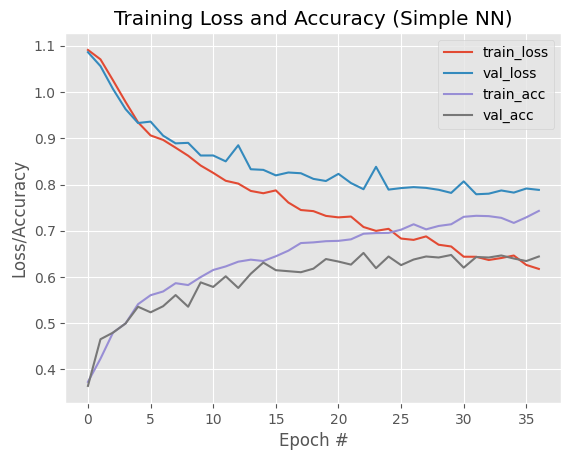

In [79]:
# Ваш код
N = np.arange(0, 37)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')

### 8. Сохранение модели и меток классов:

In [84]:
# Ваш код
def save_model_and_labels(model, lb, model_path = "model.h5", labels_path = "label_bin"):
    """
    Сохраняет модель машинного обучения и метки классов в бинарном формате на диск.

    Args:
        model: Модель машинного обучения.
        lb: Метки классов.
        model_path: Путь к файлу модели.
        labels_path: Путь к файлу меток.

    Returns:
        None.
    """

    # Сохранение модели
    model.save(model_path, save_format="h5")

    # Сохранение меток
    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

In [101]:
model_path = "model.h5"
labels_path = "label_bin"

In [86]:
save_model_and_labels(model, lb, model_path, labels_path)

### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [87]:
# Ваш код
from keras.models import load_model
import gradio as gr  # Библиотека для создания веб-интерфейсов
import pickle
import cv2

#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [98]:
# Ваш код
def preprocess_image(img, compression_size = 32):

    """
    Функция для изменения размера, "выравнивания" и масштабирования изображения.

    Args:
    img: Изображение.

    Returns:
    Предобработанное изображение.
    """

    image = img.copy()  # Создаем копию изображения
    # Изменяем размер изображения до compression_size x compression_size пикселей
    image = cv2.resize(image, (compression_size, compression_size))
    # Преобразуем изображение в одномерный массив (вектор)
    image = image.flatten()
    # Масштабируем значения пикселей к диапазону [0, 1]
    image = image.astype("float") / 255.0
    # Преобразуем массив в формат, совместимый с нашей моделью Keras
    image = image.reshape((1, image.shape[0]))

    return image


#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [102]:
# Ваш код
def predict_image(img, preprocess_func = preprocess_image, model_path = "/content/drive/MyDrive/Задание_2/dataset/model.h5", label_path = "/content/drive/MyDrive/Задание_2/dataset/label_bin"):

    """
    Функция для выполнения предсказания класса, возвращает
    словарь с вероятностями для каждого класса.

    Args:
    img: Изображение.
    preprocess_funk: Функция для предобработки изображения.
    model_path: Путь к файлу модели.
    label_path: Путь к файлу с метками.

    Returns:
    Словарь с метками и вероятностями для каждого класса.
    """

    # Загружаем модель и метки
    model = load_model(model_path)  # Загрузка модели Keras
    lb = pickle.loads(open(label_path, "rb").read())  # Загрузка словаря с метками

    # Делаем предсказание на изображении
    image = preprocess_func(img.copy())  # Предобработка изображения
    preds = model.predict(image).flatten()  # Выполнение предсказания

    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

    return confidences

### 10. Визуализируем интерфейс и произведем классификацию:

In [ ]:
# Ваш код
interface = gr.Interface(
  fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
  inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
  outputs= gr.Label(num_top_classes=len(lb.classes_)), # Выходные данные: топ-N классов с наибольшей вероятностью
  examples=["/content/drive/MyDrive/Задание_2/dataset/test/cavallo/OIP-_Cwny6ZT22zD0qVv0D3RBQHaF7.jpeg",
            "/content/drive/MyDrive/Задание_2/dataset/test/ragno/e830b90f20f5043ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg",
            "/content/drive/MyDrive/Задание_2/dataset/test/elefante/e83db30d2cfd033ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg"])

# Запускаем интерфейс
interface.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://3105dea0d42614bf0b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 93ms/step
